<a href="https://colab.research.google.com/github/tkd8973/DataAnalysis_SSW/blob/main/tkd8973/Df_date_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터프레임의 합성

* `numpy` 배열을 합치는 것`
  * `concatenate`, `vstack`(열 사이즈), `hstack`(행)
  * `dstack`(m x n), `stack`(m x n) ... 모양이 맞는 것들을 연결

> 1:1로 연결

|이름|전화번호|
|-|-|
|김제육|010-xxxx-xxxx|
|이김치|010-xxxx-xxxx|

|이름|주소|
|-|-|
|김제육|서울시 제육구|
|이김치|경기도 김치시|

↓

|이름|전화번호|주소|
|-|-|-|
|김제육|010-xxxx-xxxx|서울시 제육구|
|이김치|010-xxxx-xxxx|경기도 김치시|

`이름` : `공통 열`
행 라벨 -> 열, 이름. 행 인덱스
0~10....

> 1:M 로 연결

|이름|주소|
|-|-|
|A|서울시|
|B|경기도|
|C|서울시|
|D|울산시|

|주소|지원금|
|-|-|
|서울시|10000|
|경기도|11100|
|인천시|20000|

↓

|이름|주소|지원금|
|-|-|-|
|A|서울시|10000|
|B|경기도|11100|
|C|서울시|10000|

## `merge` (두 개 이상의 데이터프레임을 join, 연결)

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1 # 고객 목록

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2 # 구매 기록

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [ ]:
# merge : 결합하다 -> pandas.merge(df1, df2) # df1 (left), df2 (right)
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df1, right=df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df2, right=df1)

,고객번호,금액,이름
0,1001,10000,둘리
1,1001,20000,둘리
2,1001,30000,둘리
3,1005,15000,희동
4,1006,5000,마이콜


In [ ]:
pd.merge(left=df1, right=df2, on="고객번호")

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df1, right=df2, on="고객번호", how='inner')
# inner join : (기준되는 열) 양쪽 데이터프레임에 모두 속하는 원소들만 남겨줌

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
df1.고객번호.unique()

array([1001, 1002, 1003, 1004, 1005, 1006, 1007])

In [ ]:
df2.고객번호.unique()

array([1001, 1005, 1006, 1008])

In [ ]:
pd.merge(df1, df2, how='inner') # default

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
# 왼쪽 오른쪽 안가리고, 고객번호에 값이 있다면 다 가져오겠다
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [ ]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [ ]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [ ]:
df1.품종.value_counts()

setosa       2
virginica    2
Name: 품종, dtype: int64

In [ ]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [ ]:
df2.품종.value_counts()

virginica     2
setosa        1
versicolor    1
Name: 품종, dtype: int64

In [ ]:
pd.merge(df1, df2)
# 1. 공통으로 존재하는 열을 찾음 (품종)
# 2. 품종들이 몇개씩 있는지 -> 같은 열에 동일한 원소가 여러 개
# -> 원소들끼리의 모든 경우의 수 (조합)을 만들어냄
# 3. inner (df1, df2가 모두 존재하는 걸로만 연결결)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [ ]:
pd.merge(df1, df2, how='outer')

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5
6,versicolor,NaN,0.3


### 연결되면 안되는 열의 이름이 같을 때

In [ ]:
# 두 df에서 이름이 같은 열은 모두 연결하는 기준 (키=on)
# 이름은 같아도 키가 되면 안되는 열 => `on` 무엇을 기준을 할지 명시
# (학생) 수업ID / 이름 (학생의 이름)
# (수업) 수업ID / 이름 (수업의 이름)
# -> on=[수업ID, 이름] ??? -> on='수업ID'
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [ ]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [ ]:
# pd.merge(df1, df2)
pd.merge(df1, df2, on=['고객명', '데이터'])

,고객명,날짜,데이터


In [ ]:
pd.merge(df1, df2, on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [ ]:
# prefix -> 접두사
# suffix -> 접미사
pd.merge(df1, df2, on='고객명', suffixes=["_A", "_B"])

,고객명,날짜,데이터_A,데이터_B
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 연결하는 기준이 되는 열들의 이름이 다를 때

In [ ]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [ ]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2 # df2['이름'] = df2['성명'], df2.drop...['성명']??, rename...

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [ ]:
pd.merge(df1, df2)

MergeError: ignored

In [ ]:
# pd.merge(df1, df2, left_on='이름', right_on='성명')
pd.merge(df1, df2, left_on='이름', right_on='성명')

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [ ]:
df01 = pd.merge(df1, df2, left_on='이름', right_on='성명')
df01.drop('성명', inplace=True, axis=1)
df01

,이름,성적,성적2
0,영희,1,4
1,영희,1,5
2,철수,2,6
3,철수,3,6


### 인덱스를 기준으로 합쳐주고 싶을 때

In [ ]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [ ]:
import numpy as np

df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [ ]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [ ]:
df2.reset_index()

,level_0,level_1,데이터1,데이터2
0,부산,2000,0,1
1,부산,2005,2,3
2,서울,2000,4,5
3,서울,2005,6,7
4,서울,2010,8,9
5,서울,2015,10,11


In [ ]:
pd.merge(df1, df2.reset_index(),
         left_on=['도시', '연도'],
         right_on=['level_0', 'level_1'])

,도시,연도,인구,level_0,level_1,데이터1,데이터2
0,서울,2000,9853972,서울,2000,4,5
1,서울,2005,9762546,서울,2005,6,7
2,서울,2010,9631482,서울,2010,8,9
3,부산,2000,3655437,부산,2000,0,1
4,부산,2005,3512547,부산,2005,2,3


### `join`을 통한 합성

In [ ]:
# pd.merge(left, right, ...) # on? index?... how?
# df1 -> left
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df1, df2

(          품종  꽃잎길이
 0     setosa   1.4
 1     setosa   1.3
 2  virginica   1.5
 3  virginica   1.3,            품종  꽃잎너비
 0      setosa   0.4
 1   virginica   0.3
 2   virginica   0.5
 3  versicolor   0.3)

In [ ]:
df1.join(df2)

ValueError: ignored

In [ ]:
# join : 두 개의 df을 인덱스 기준으로 합쳐주는 메소드
df1.join(df2, lsuffix='l', rsuffix='r') # join -> index를 기준으로 합쳐버림

,품종l,꽃잎길이,품종r,꽃잎너비
0,setosa,1.4,setosa,0.4
1,setosa,1.3,virginica,0.3
2,virginica,1.5,virginica,0.5
3,virginica,1.3,versicolor,0.3


In [ ]:
df1.set_index('품종').join(df2.set_index('품종'))

,꽃잎길이,꽃잎너비
품종,,
setosa,1.4,0.4
setosa,1.3,0.4
virginica,1.5,0.3
virginica,1.5,0.5
virginica,1.3,0.3
virginica,1.3,0.5


### `merge`
- 두 데이터프레임 사이의 크기가 같을 필요가 없음 (기준이 되는 열, 인덱스를 바탕으로 outer, inner... 내용들을 재구성)
- `on` ... -> 어떠한 열을 기준으로 해줄까? `index`...
- 두 개의 데이터가 공통 분모만 있다면 (키) 연결
- 열 기준으로 연결할 필요가 없다? `join` -> 인덱스를 기준

## `concat`
* `merge` : 특정한 열을 기준(또는 인덱스)으로 해서 연결
* `concat` : 기준 열을 사용하지 않고 데이터를 연결(붙임) - np.concatenate, vstack, hstack...

In [ ]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])

In [ ]:
s1

A    0
B    1
dtype: int64

In [ ]:
s2

A    2
B    3
C    4
dtype: int64

In [ ]:
# pd.concat
pd.concat([s1, s2])
pd.concat([s1, s2], axis=0)

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [ ]:
pd.concat([s1, s2], axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


# 피봇테이블과 그룹 분석

## 피봇테이블
* Pivot Table : 데이터 열 중에서 두 개의 열을 각각 행과 열 인덱스로 사용해서 데이터를 조회해 놓은 것
* 엑셀 -> 피봇테이블
* Pandas -> 피봇테이블 `pivot` (행 인덱스로 사용할 열이름, 열 인덱스로 사용할 열 이름)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]

In [ ]:
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [ ]:
# 행 인덱스, 열 인덱스, 묶어줄 데이터 
df1.pivot('도시','연도','인구') # 행/열 인덱스를 만족하는 데이터가 없으면 NaN

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [ ]:
# 조건을 만족하는 data가 2개 이상이면 pivot 불가
df1.pivot('지역','연도','인구') 

ValueError: ignored

In [ ]:
df1.set_index(['도시','연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

## 그룹분석
* 조건에 맞는 데이터가 하나 이상일 경우에 -> 데이터 그룹을 이룸 (피봇 테이블 형태로 표현을 X)
* 그룹의 특성을 보여주는 (통계치, 계산...) => 그룹 분석 (group analysis)
* group -> `groupby`

1. 분석하고자 하는 Series, df에 `groupby` 메소드 호출 -> 그룹화
1. 그룹화 -> 그룹 객체 -> 그룹 연산

### groupby 메소드
* 데이터를 그룹별로 분류하는 역할.
    * 열 또는 열의 리스트 (어떤 열을 기준으로 그룹을 넣어줄 것이냐
    * 행 인덱스
=> GroupBy (그룹화) => 그룹 함수 or 그룹 연산 => 특정한 값. 배열...

In [ ]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    5 non-null      object
 1   key2    5 non-null      object
 2   data1   5 non-null      int64 
 3   data2   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [ ]:
groups = df2.groupby(df2.key1)  # 
groups

In [ ]:
# groupby.groups(속성) : 그룹별 구성 현황
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [ ]:
groups.count()  # NaN을 제외한 데이터 개수

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


In [ ]:
df3 = df2.copy()
df3.iloc[1,1] = np.nan
df3.groupby(df3.key1).count()

,key2,data1,data2
key1,,,
A,2,3,3
B,2,2,2


In [ ]:
groups.size() # ==len(행)

key1
A    3
B    2
dtype: int64

In [ ]:
# 평균
groups.mean()

,data1,data2
key1,,
A,2.666667,26.666667
B,3.500000,35.000000


In [ ]:
# 중앙값 (median)
groups.median()

,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [ ]:
# 최대값
groups.max()

,key2,data1,data2
key1,,,
A,two,5,50
B,two,4,40


In [ ]:
# 최소값
groups.min()

,key2,data1,data2
key1,,,
A,one,1,10
B,one,3,30


In [ ]:
# 합계
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [ ]:
# 일괄적으로 곱함
groups.prod()

,data1,data2
key1,,
A,10,10000
B,12,1200


In [ ]:
# 표준편차, 분산, 중간값(50%)
groups.std(), groups.var(), groups.quantile(0.5)

<ipython-input-50-b6a819cbd28a>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.std(), groups.var(), groups.quantile(0.5)


(         data1      data2
 key1                     
 A     2.081666  20.816660
 B     0.707107   7.071068,          data1       data2
 key1                      
 A     4.333333  433.333333
 B     0.500000   50.000000,       data1  data2
 key1              
 A       2.0   20.0
 B       3.5   35.0)

In [ ]:
# 특정한 열만 뽑아주고 싶다
groups.std().data1, groups.var().data1, groups.quantile(0.5).data1

<ipython-input-51-9f8a0a79613d>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.std().data1, groups.var().data1, groups.quantile(0.5).data1


(key1
 A    2.081666
 B    0.707107
 Name: data1, dtype: float64, key1
 A    4.333333
 B    0.500000
 Name: data1, dtype: float64, key1
 A    2.0
 B    3.5
 Name: data1, dtype: float64)

### 복합키

In [ ]:
print(df1.groupby('도시')['인구'].sum())
print('----------------')
print(df1.groupby('지역')['인구'].sum())
print('----------------')
print(df1.groupby(['지역','도시'])['인구'].sum())

도시
부산    10354475
서울    29298340
인천     3153654
Name: 인구, dtype: int64
----------------
지역
경상권    10354475
수도권    32451994
Name: 인구, dtype: int64
----------------
지역   도시
경상권  부산    10354475
수도권  서울    29298340
     인천     3153654
Name: 인구, dtype: int64


In [ ]:
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [ ]:
df2.data1.groupby([df2.key1,df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [ ]:
df1.groupby([df1.지역,df1.연도])

,인구
지역,
경상권,10354475
수도권,32451994


In [ ]:
# 2개 이상의 키를 사용해주려면 [] 담아야함


인구                   
연도      2005     2010      2015
지역                             
경상권  3512547  3393191   3448737
수도권  9762546  9894685  12794763

### agg (aggregate)

In [ ]:
import seaborn as sns # 예시 데이터들을 불러올 수 있음
iris = sns.load_dataset('iris') # 붓꽃
iris # 붓꽃의 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
# 각 붓꽃의 종별로 (열별로) 가장 큰 값과 가장 작은 값의 비율을 구해보기
# (sepal:꽃받침) (petal:꽃잎)
iris.groupby(iris.species).agg(lambda x:x.max()/x.min())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# petal이 높은 상위 3개
def top3(df):
    return df.sort_values(by='petal_length',ascending=0)[:3]
def top1(df):
    return df.sort_values(by='petal_length',ascending=0)[:1]

iris.groupby(iris.species).apply(top3)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

* `agg` : 그룹 들의 대표값
* `apply` : 그룹들로 나뉘어진 행에 대해서 반복적 연산

In [ ]:
iris.groupby(iris.species).apply(top1)

,,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,,
setosa,24,4.8,3.4,1.9,0.2,setosa
versicolor,83,6.0,2.7,5.1,1.6,versicolor
virginica,118,7.7,2.6,6.9,2.3,virginica


# 시계열 자료 다루기
* 인덱스가 시간 또는 날짜인 데이터 -> 순서가 시간/날짜 데이터에 따라 정해져있음
* 시계열 데이터의 인덱스 `DatetimeIndex`
```
2022-12-09 <- 텍스트 형태로 인덱스가 제공. => `DatetimeIndex`
```
* 꼭 일정 기간에 꽉차져있는 형태로 인덱스가 X (날짜 형식만 지키면 됨)
---
* `pd.to_datetime`
* `pd.date_range`

In [ ]:
# pd.to_datetime => (시간, 날짜 형태로 표현된 데이터들의 나열된 리스트...) => DatetimeIndex
date_str = ['2023.1.1','2023.1.5','2023.1.9','2023.1.11']
date = pd.to_datetime(date_str)
date

DatetimeIndex(['2023-01-01', '2023-01-05', '2023-01-09', '2023-01-11'], dtype='datetime64[ns]', freq=None)

In [ ]:
s = pd.Series(np.random.randn(len(date)),date)
s

2023-01-01   -0.103219
2023-01-05    0.410599
2023-01-09    0.144044
2023-01-11    1.454274
dtype: float64

In [ ]:
# pd.date_range : range, arange처럼 시작일/종료일 또는 시작일/기간을 입력하면 범위 내의 시간/날짜 인덱스를 생성
# 1. 시작일과 종료일
pd.date_range('2023-1-1','2023-2-1')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 2. 시작일과 기간
# freq : 빈도, 'D'- Day 
pd.date_range('2023-1-1','2023-2-1',freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2023',periods=30,freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2023',periods=30,freq='M')   # M : LastDay 
pd.date_range('2023',periods=30,freq='MS')   # MS : First Day 

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30'],
              dtype='datetime64[ns]', freq='M')

## `shift`

In [ ]:
# 시계열의 데이터의 인덱스는 '시간'(순서) => 날짜 이동 => 전날/오늘 데이터 비교, 연산...
# 날짜/시간 -> DatetimeIndex => 인덱스는 그대로 두고 데이터만 이동
!pip install yfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf

tqqq = yf.Ticker('TQQQ').history()
tqqq

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-02-14 00:00:00-05:00,24.540001,25.740000,24.049999,25.490000,255737200,0.0,0.0,0.0
2023-02-15 00:00:00-05:00,25.020000,26.100000,24.850000,26.059999,137763700,0.0,0.0,0.0
2023-02-16 00:00:00-05:00,24.830000,25.870001,24.530001,24.570000,194496500,0.0,0.0,0.0
2023-02-17 00:00:00-05:00,24.030001,24.230000,23.299999,24.040001,194902400,0.0,0.0,0.0
2023-02-21 00:00:00-05:00,23.100000,23.450001,22.290001,22.350000,150468800,0.0,0.0,0.0
2023-02-22 00:00:00-05:00,22.450001,22.850000,21.980000,22.370001,167338700,0.0,0.0,0.0
2023-02-23 00:00:00-05:00,23.190001,23.230000,21.950001,22.930000,179770000,0.0,0.0,0.0
2023-02-24 00:00:00-05:00,21.750000,22.030001,21.350000,21.770000,172781800,0.0,0.0,0.0
2023-02-27 00:00:00-05:00,22.480000,22.799999,22.100000,22.240000,138754400,0.0,0.0,0.0


In [ ]:
df = tqqq['Close']
df

Date
2023-02-14 00:00:00-05:00    25.490000
2023-02-15 00:00:00-05:00    26.059999
2023-02-16 00:00:00-05:00    24.570000
2023-02-17 00:00:00-05:00    24.040001
2023-02-21 00:00:00-05:00    22.350000
2023-02-22 00:00:00-05:00    22.370001
2023-02-23 00:00:00-05:00    22.930000
2023-02-24 00:00:00-05:00    21.770000
2023-02-27 00:00:00-05:00    22.240000
2023-02-28 00:00:00-05:00    22.129999
2023-03-01 00:00:00-05:00    21.590000
2023-03-02 00:00:00-05:00    22.110001
2023-03-03 00:00:00-05:00    23.459999
2023-03-06 00:00:00-05:00    23.559999
2023-03-07 00:00:00-05:00    22.680000
2023-03-08 00:00:00-05:00    22.990000
2023-03-09 00:00:00-05:00    21.780001
2023-03-10 00:00:00-05:00    20.879999
2023-03-13 00:00:00-04:00    21.330000
Name: Close, dtype: float64

In [ ]:
((df-df.shift(1))/df.shift(1)).fillna(0).apply(lambda x: f'{x*100:.2f}%')

Date
2023-02-14 00:00:00-05:00     0.00%
2023-02-15 00:00:00-05:00     2.24%
2023-02-16 00:00:00-05:00    -5.72%
2023-02-17 00:00:00-05:00    -2.16%
2023-02-21 00:00:00-05:00    -7.03%
2023-02-22 00:00:00-05:00     0.09%
2023-02-23 00:00:00-05:00     2.50%
2023-02-24 00:00:00-05:00    -5.06%
2023-02-27 00:00:00-05:00     2.16%
2023-02-28 00:00:00-05:00    -0.49%
2023-03-01 00:00:00-05:00    -2.44%
2023-03-02 00:00:00-05:00     2.41%
2023-03-03 00:00:00-05:00     6.11%
2023-03-06 00:00:00-05:00     0.43%
2023-03-07 00:00:00-05:00    -3.74%
2023-03-08 00:00:00-05:00     1.37%
2023-03-09 00:00:00-05:00    -5.26%
2023-03-10 00:00:00-05:00    -4.13%
2023-03-13 00:00:00-04:00     2.16%
Name: Close, dtype: object

### `resample` 연산
* 시간 간격을 재조정
* 시간 구간을 작게 만든다 -> 데이터 양이 증가 -> 업-샘플링(up-sampling)
* 시간 구간을 크게 만든다 -> 데이터 양이 감소 -> 다운-샘플링(down-sampling)

In [ ]:
!pip install pyupbit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 4.0 MB/s eta 0:00:00


In [ ]:
# 다운-샘플링 -> 시간을 더 크게 묶는 거 -> "D(Day)" => "Week?"
import pyupbit
btc = pyupbit.get_ohlcv('KRW-BTC')
pd.options.display.float_format = "{:.2f}".format
# 다운 샘플링시에는 대표값을 정해야 한다 
btc.resample('W').mean()

,open,high,low,close,volume,value
2022-08-28,27846500.00,28014000.00,27300000.00,27419000.00,2803.04,77688264484.74
2022-09-04,27480428.57,27891428.57,27204714.29,27545428.57,3223.13,88940896300.40
2022-09-11,27709714.29,28420142.86,27373857.14,28067428.57,5845.60,163248704312.63
2022-09-18,28793428.57,29174000.00,28009714.29,28424857.14,7305.33,211266561681.29
2022-09-25,27252571.43,27715571.43,26599285.71,27192571.43,6115.04,165597780573.10
2022-10-02,27702000.00,28333857.14,27286857.14,27795142.86,6099.03,169988939428.63
2022-10-09,28227857.14,28535857.14,27890714.29,28235000.00,4086.82,115781239224.63
2022-10-16,27555285.71,27894000.00,27222428.57,27549857.14,3855.96,106029508484.91
2022-10-23,27691142.86,27936714.29,27450428.57,27735428.57,2905.84,80515164787.73
2022-10-30,28572428.57,29090857.14,28349428.57,28710285.71,4563.46,131345025489.07


In [ ]:
# .first / .last : 맨 앞과 맨 마지막
btc.resample('M').first()

,open,high,low,close,volume,value
2022-08-31,27954000.00,28150000.00,27510000.00,27739000.00,3125.26,86963182786.78
2022-09-30,27521000.00,27773000.00,27100000.00,27636000.00,3585.51,98555665886.73
2022-10-31,27924000.00,28008000.00,27696000.00,27868000.00,2546.83,70954974472.51
2022-11-30,28778000.00,28928000.00,28634000.00,28749000.00,2933.72,84430214876.02
2022-12-31,23209000.00,23400000.00,22871000.00,23002000.00,3278.52,75761071316.26
2023-01-31,21079000.00,21171000.00,21002000.00,21123000.00,1486.47,31357935910.19
2023-02-28,29052000.00,29740000.00,28626000.00,29620000.00,5637.92,164241675658.55
2023-03-31,31024000.00,31600000.00,30805000.00,31106000.00,4532.68,141609641287.40


In [ ]:
btc.index = btc.index.date
btc.head()

,open,high,low,close,volume,value
2022-08-27,27954000.00,28150000.00,27510000.00,27739000.00,3125.26,86963182786.78
2022-08-28,27739000.00,27878000.00,27090000.00,27099000.00,2480.82,68413346182.69
2022-08-29,27098000.00,28066000.00,27094000.00,27792000.00,3709.53,102229321499.59
2022-08-30,27792000.00,28150000.00,27155000.00,27314000.00,4229.55,117154442399.74
2022-08-31,27314000.00,27957000.00,27286000.00,27530000.00,3677.30,101805940867.43


In [ ]:
btc2 = pyupbit.get_ohlcv('KRW-BTC',interval='minute60')
btc2

,open,high,low,close,volume,value
2023-03-06 08:00:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 09:00:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 10:00:00,29981000.00,30000000.00,29808000.00,29878000.00,247.52,7402551140.97
2023-03-06 11:00:00,29864000.00,29877000.00,29752000.00,29825000.00,289.96,8640849018.64
2023-03-06 12:00:00,29827000.00,29854000.00,29780000.00,29802000.00,95.39,2843638454.62
...,...,...,...,...,...,...
2023-03-14 11:00:00,32205000.00,32302000.00,31972000.00,32064000.00,576.67,18517767926.75
2023-03-14 12:00:00,32064000.00,32189000.00,31946000.00,32131000.00,312.03,10013690269.88
2023-03-14 13:00:00,32131000.00,32217000.00,32114000.00,32178000.00,305.14,9810953701.85
2023-03-14 14:00:00,32182000.00,32630000.00,32005000.00,32101000.00,887.54,28653568550.47


In [ ]:
btc2.resample('10Min').ffill().head(20)    # 60m -> 10m, Front Fill(앞의 값으로 fill)

,open,high,low,close,volume,value
2023-03-06 08:00:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 08:10:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 08:20:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 08:30:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 08:40:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 08:50:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 09:00:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 09:10:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 09:20:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 09:30:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64


In [ ]:
btc2.resample('10Min').bfill().head(20)    # 60m -> 10m, Back Fill(앞의 값으로 fill)

,open,high,low,close,volume,value
2023-03-06 08:00:00,29991000.00,30014000.00,29951000.00,29982000.00,113.92,3415775323.11
2023-03-06 08:10:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 08:20:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 08:30:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 08:40:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 08:50:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 09:00:00,29982000.00,30022000.00,29898000.00,29982000.00,148.37,4446634962.64
2023-03-06 09:10:00,29981000.00,30000000.00,29808000.00,29878000.00,247.52,7402551140.97
2023-03-06 09:20:00,29981000.00,30000000.00,29808000.00,29878000.00,247.52,7402551140.97
2023-03-06 09:30:00,29981000.00,30000000.00,29808000.00,29878000.00,247.52,7402551140.97


### Down-sampling
* 1분 -> 10분 묶음 (데이터의 전체 수는 줄이고, 데이터 간의 구간은 늘리는 리샘플링) => 다운-샘플링 => 묶인 데이터들간의 '대표값' => 그룹함수, 집계함수 ==> (대표값)

## Up-sampling
* `ffill` : 앞전 시간대의 값을 불러와줌 (forward)
* `bfill` : 뒤 시간대의 값을 채워줌 (backward)

### `dt`

In [ ]:
# dt -> datetime 여러가지 연산, 속성
s = pd.Series(pd.date_range('2023-1-1',periods=100))
s

0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
        ...    
95   2023-04-06
96   2023-04-07
97   2023-04-08
98   2023-04-09
99   2023-04-10
Length: 100, dtype: datetime64[ns]

In [ ]:
# dtype -> 일괄적으로 날짜/시간값을 처리할 수 있게 속성값
s.astype('str').str

In [ ]:
s.dt.year
s.dt.month
s.dt.day
s.dt.strftime('%y-%m-%d')
s.dt.weekday

0     6
1     0
2     1
3     2
4     3
     ..
95    3
96    4
97    5
98    6
99    0
Length: 100, dtype: int64

In [ ]:
# https://financedatareader.readthedocs.io/en/latest/
!pip install finance-datareader -q
# --quiet

In [ ]:
import FinanceDataReader as fdr # fdr

In [ ]:
fdr.StockListing('KRX') # 현재 상장된 한국 주식데이터 목록
# 삼성전자 : 005930

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,59700,2,-700,-1.16,59900,60000,59500,908651,54270489300,356396018235000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,508000,2,-7000,-1.36,506000,508000,501000,26013,13136689000,118872000000000,234000000,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,826000,2,-1000,-0.12,827000,827000,823000,568,469025000,58789724000000,71174000,STK
3,000660,KR7000660001,SK하이닉스,KOSPI,,80000,2,-1500,-1.84,80100,80400,79500,186818,14952083700,58240189200000,728002365,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,54200,2,-500,-0.91,54300,54400,54200,17279,937798800,44600459140000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,267810,KR7267810000,앙츠,KONEX,일반기업부,1130,0,0,0.00,0,0,0,0,0,2019310000,1787000,KNX
2679,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,0,0,0.00,0,0,0,0,0,1945497000,38147000,KNX
2680,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2681,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX


In [ ]:
df = fdr.StockListing('KRX')

In [ ]:
df[df.Name == 'NAVER']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
8,035420,KR7035420009,NAVER,KOSPI,,194000,2,-1000,-0.51,192500,195000,192000,40511,7836844000,31825522490000,164049085,STK


In [ ]:
df[df.Name == '카카오']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
10,035720,KR7035720002,카카오,KOSPI,,57900,2,-200,-0.34,57700,58000,57400,95477,5513521800,25789261407300,445410387,STK


In [ ]:
se = fdr.DataReader('005930')
se

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-11,837,850,814,814,588820,NaN
1998-09-12,823,829,806,816,326350,0.002457
1998-09-14,806,814,794,804,410550,-0.014706
1998-09-15,799,804,766,783,698220,-0.026119
1998-09-16,785,810,779,785,439220,0.002554
...,...,...,...,...,...,...
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,58900,12100662,-0.005068
2022-12-08,58700,59200,58600,59200,12986815,0.005093


In [ ]:
se.resample('MS').first()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-01,837,850,814,814,588820,0.002457
1998-10-01,720,724,700,705,389970,-0.031593
1998-11-01,1168,1176,1120,1132,1471740,-0.014795
1998-12-01,1254,1254,1162,1197,877940,-0.061912
1999-01-01,1776,1776,1624,1693,666160,0.095084
...,...,...,...,...,...,...
2022-08-01,61000,61700,60300,61300,13154816,-0.001629
2022-09-01,58700,58900,58300,58400,14905777,-0.021776
2022-10-01,55300,55400,54500,55200,19148435,0.039548


In [ ]:
se.resample('YS').mean()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-01,1085.011628,1116.732558,1056.965116,1088.244186,9.552018e+05,0.008609
1999-01-01,3042.759036,3131.196787,2968.831325,3046.895582,8.627532e+05,0.005742
2000-01-01,5382.593361,5516.601660,5248.804979,5372.406639,1.118580e+06,-0.001001
2001-01-01,3993.719512,4071.313008,3927.918699,4003.617886,7.313713e+05,0.002954
2002-01-01,6859.209016,6971.897541,6752.295082,6865.122951,8.511943e+05,0.000935
2003-01-01,7446.457490,7545.068826,7352.323887,7454.453441,6.190000e+05,0.001734
2004-01-01,9647.698795,9765.811245,9523.477912,9647.389558,5.721826e+05,0.000240
2005-01-01,10729.016064,10835.558233,10634.220884,10739.236948,4.305591e+05,0.001628
2006-01-01,12769.429150,12893.870445,12637.829960,12758.056680,3.951112e+05,-0.000184


In [ ]:
se.rolling(200).mean()
# nan값은 지워주겠다
se.rolling(200).mean().dropna()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-06-21,1504.395,1545.375,1470.455,1507.310,8.140650e+05,0.006627
1999-06-22,1513.030,1554.230,1478.825,1516.030,8.174256e+05,0.006576
1999-06-23,1521.500,1563.110,1487.255,1524.410,8.201539e+05,0.006494
1999-06-24,1530.005,1571.890,1495.825,1532.895,8.209250e+05,0.006624
1999-06-25,1538.080,1580.340,1503.830,1541.470,8.228933e+05,0.006652
...,...,...,...,...,...,...
2022-12-06,62691.000,63207.500,62193.500,62664.500,1.494331e+07,-0.000988
2022-12-07,62612.000,63131.000,62115.000,62585.000,1.494998e+07,-0.001088
2022-12-08,62530.500,63049.000,62035.500,62506.000,1.494689e+07,-0.001076


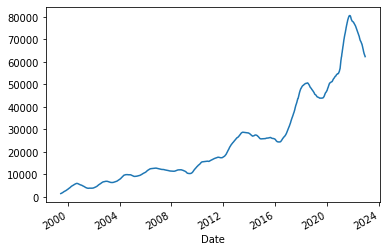

In [ ]:
se.rolling(200).mean().Close.dropna().plot()

In [ ]:
!pip install pyupbit -q

     |████████████████████████████████| 106 kB 10.4 MB/s 


In [ ]:
import pyupbit
# https://pyupbit.readthedocs.io/en/latest/
pyupbit.get_ohlcv()

,open,high,low,close,volume,value
2022-05-27 09:00:00,37662000.0,37889000.0,36413000.0,36837000.0,4373.885371,1.620369e+11
2022-05-28 09:00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
2022-05-29 09:00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
2022-05-30 09:00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
2022-05-31 09:00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11
...,...,...,...,...,...,...
2022-12-08 09:00:00,22544000.0,23000000.0,22484000.0,22918000.0,2658.301222,6.023865e+10
2022-12-09 09:00:00,22918000.0,23000000.0,22770000.0,22849000.0,2349.726274,5.371503e+10
2022-12-10 09:00:00,22845000.0,22940000.0,22820000.0,22831000.0,1339.765766,3.064659e+10
2022-12-11 09:00:00,22824000.0,22915000.0,22760000.0,22775000.0,1591.849025,3.635057e+10
